# PyTorch-Lightning Data Module (GCP Bucket Version)

In this module, we quickly demonstrate how to use the PyTorch-Lightning Module which already has the preliminary steps for preprocessing. We assume the data is already downloaded and organized in this demo.

In [1]:
# Helpful trick for loading the directories correction
import sys, os
from pyprojroot import here
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
sys.path.append(str(here()))


from src.data.worldfloods.lightning import WorldFloodsGCPDataModule

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)

%load_ext autoreload
%autoreload 2

## Load Demo Images

For this demonstration, we need a S2 AND a groundtruth image. We have two that we can download.

In [2]:
%%time

wf_dm = WorldFloodsGCPDataModule()

CPU times: user 57 µs, sys: 8 µs, total: 65 µs
Wall time: 68.7 µs


#### Prepare Data

In [3]:
%%time
wf_dm.prepare_data()

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 15.7 µs


#### Setup

This takes the longest amount of time.

In [4]:
%%time
wf_dm.setup()

CPU times: user 50.6 s, sys: 1.13 s, total: 51.8 s
Wall time: 1min 38s


#### Get DataSets

In [5]:
%%time

train_ds = wf_dm.train_dataset
val_ds = wf_dm.val_dataset
test_ds = wf_dm.test_dataset

# train_dl = wf_dm.train_dataloader()
# val_dl = wf_dm.val_dataloader()
# test_dl = wf_dm.test_dataloader()

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 11 µs


In [6]:
len(train_ds), len(test_ds), len(val_ds)

(3072159, 34903, 19371)

## Demo: Tiled Images for Train/Val/Test

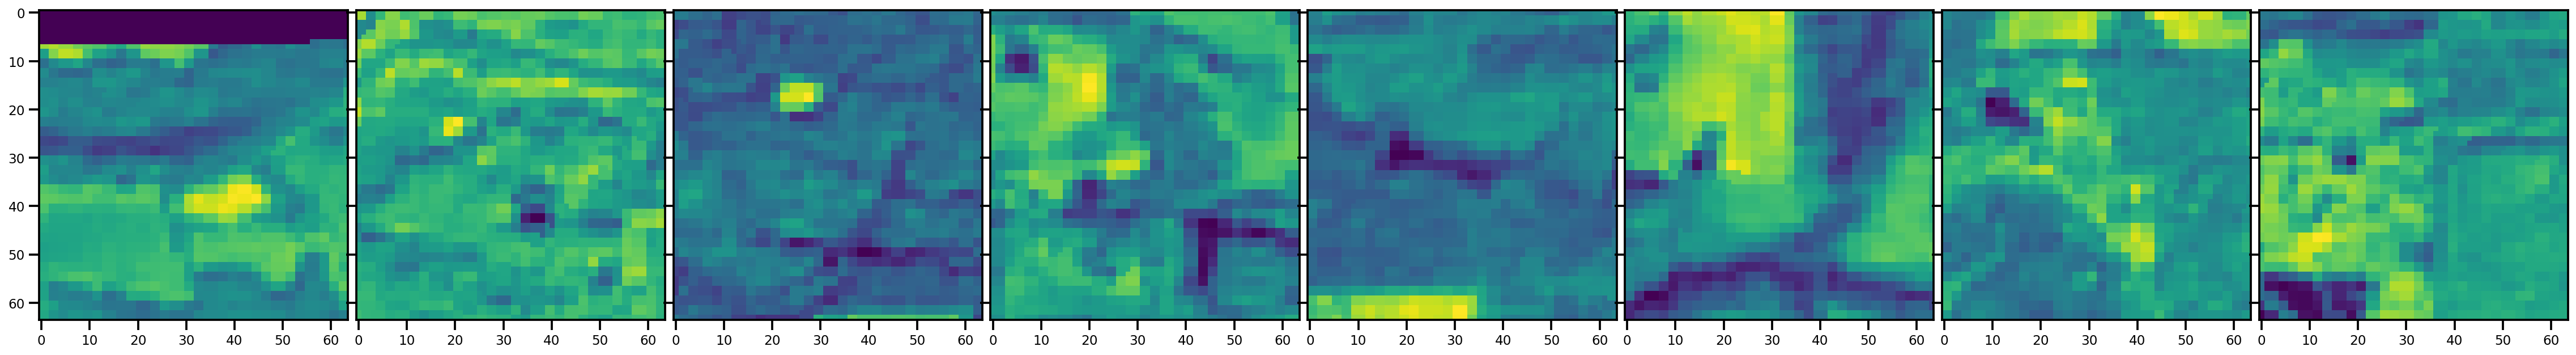

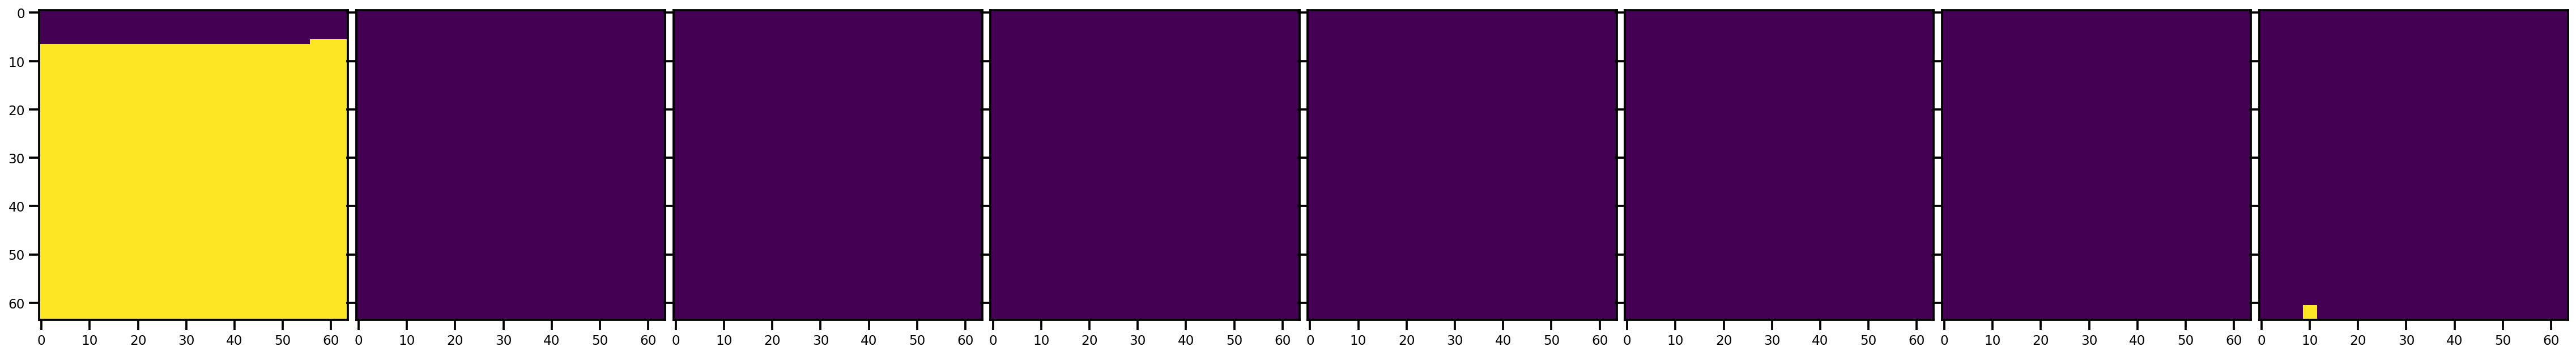

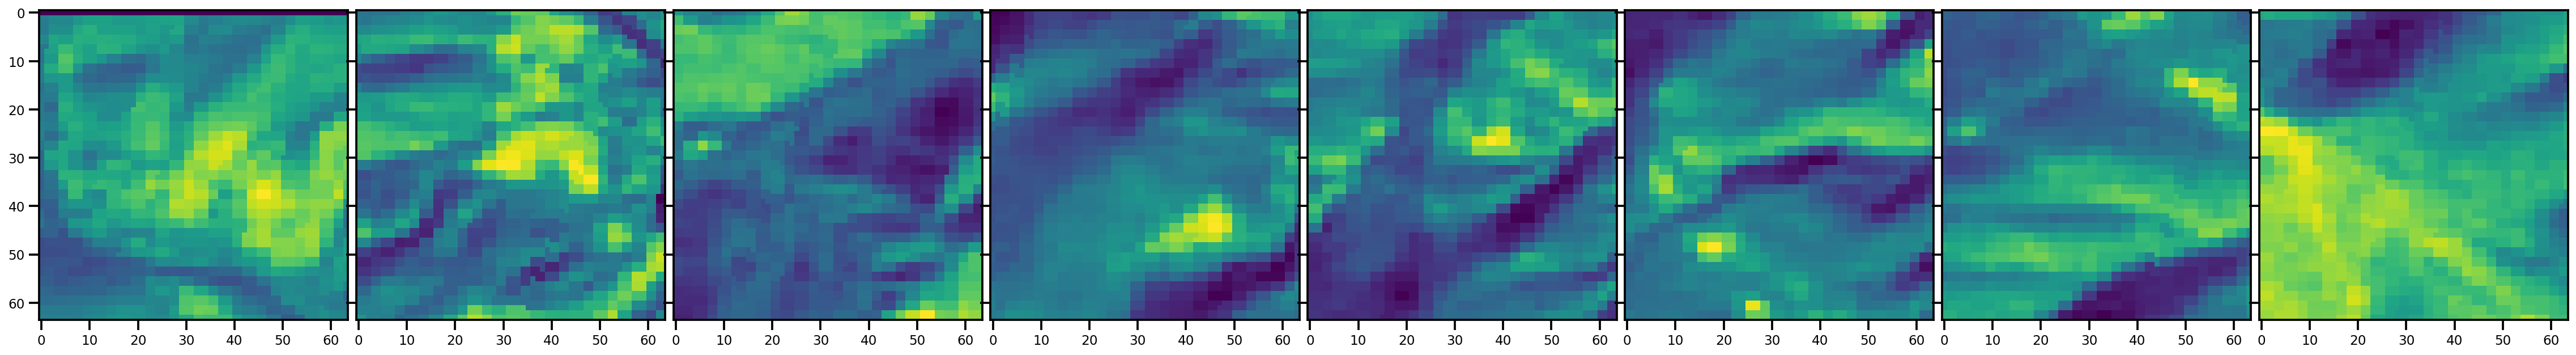

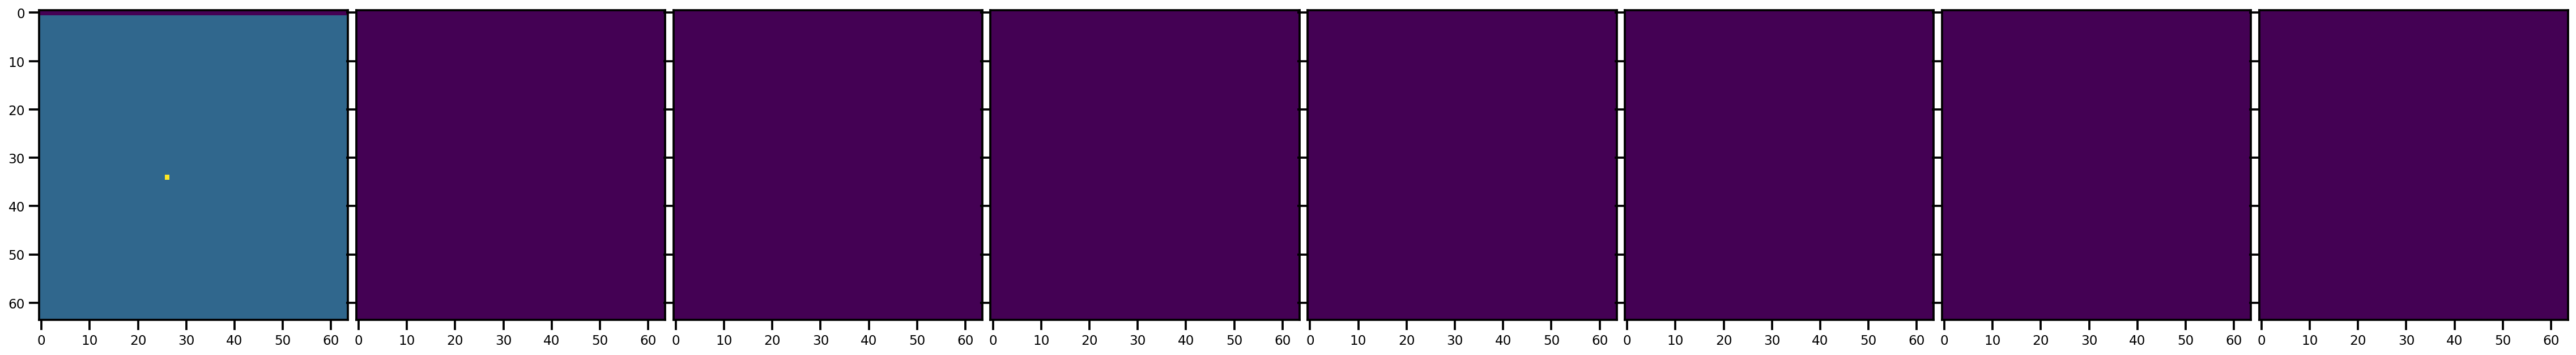

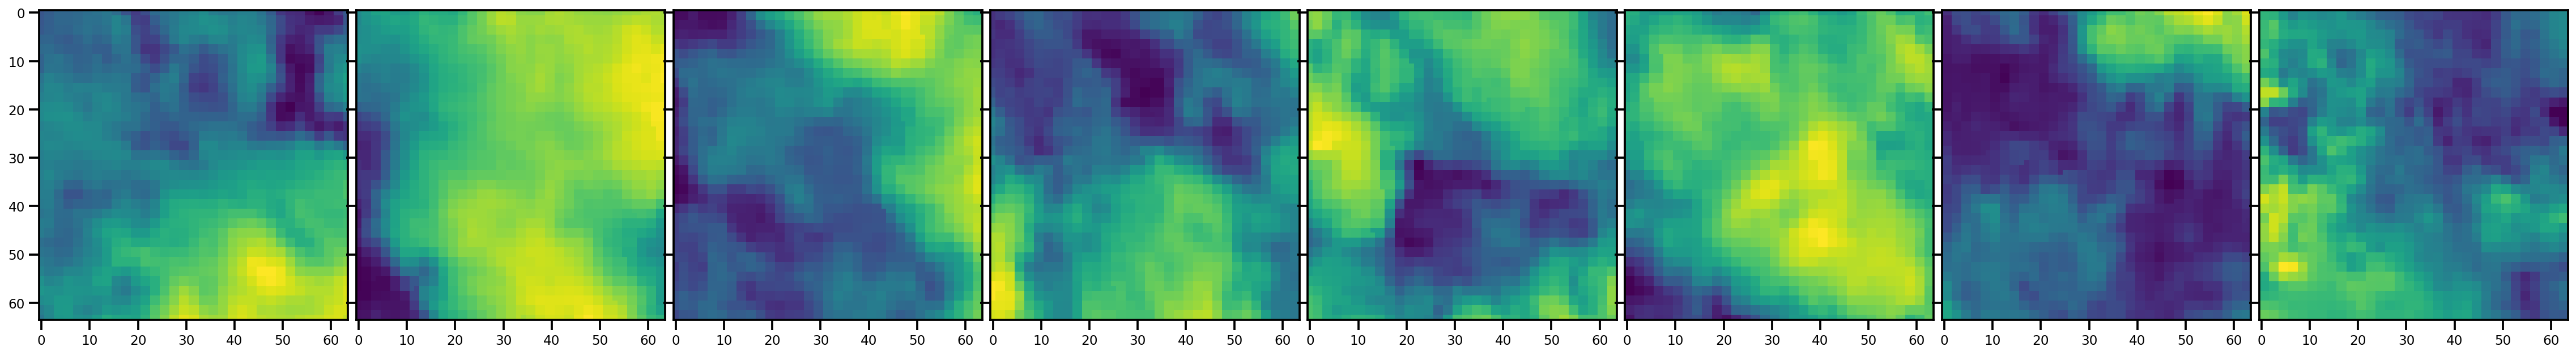

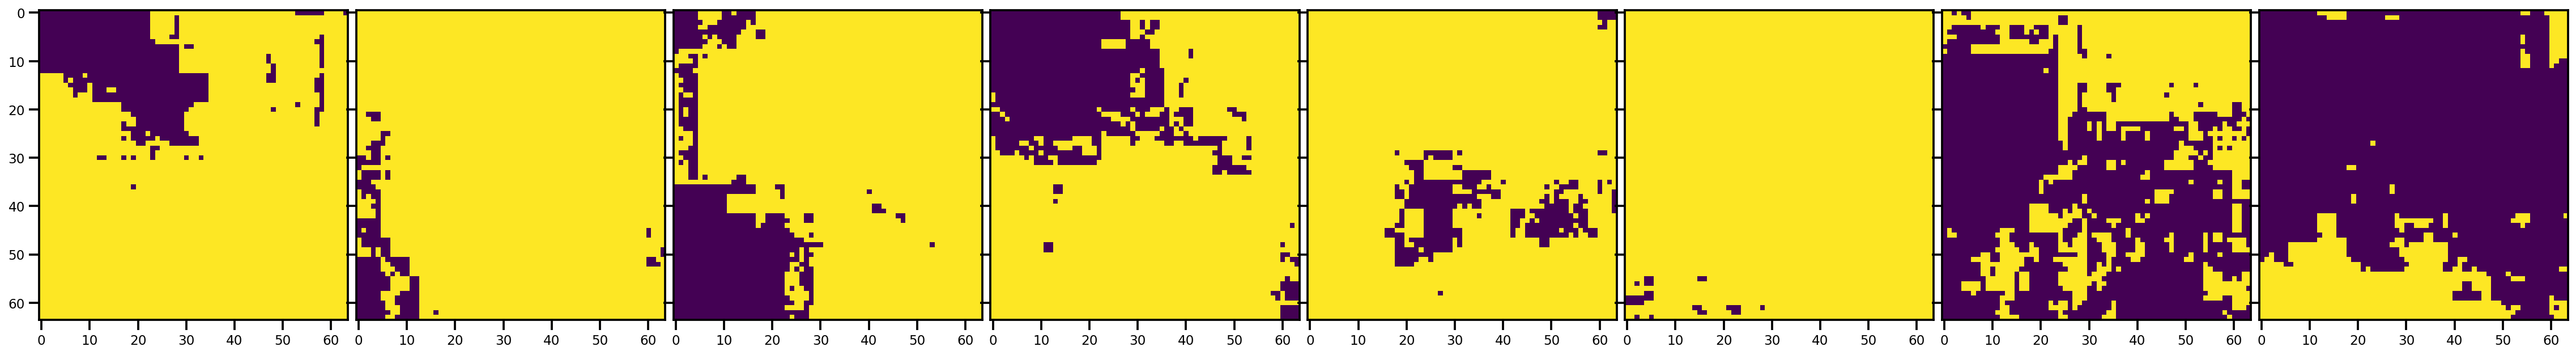

In [7]:
from rasterio.plot import show as rasterio_show
from mpl_toolkits.axes_grid1 import ImageGrid


for iloader in [train_ds, val_ds, test_ds]:

    n_tiles = 16
    n_rows = 2
    tiles_per_row = int(n_tiles / n_rows)
    iteration = 0

    # plot preamble
    fig = plt.figure(figsize=(40, 20))
    grid = ImageGrid(
        fig, 111,
        nrows_ncols=(1, tiles_per_row),
        axes_pad=0.1,
    )




    # BANDS
    bands = [6,] #CHANNELS_CONFIGURATIONS["all"]

    for iax, itile in zip(grid, range(n_tiles)):

        tile_data = iloader[itile]
    #     print(tile_data["image"].shape, tile_data["mask"].shape)
    #     print()
    #     if itile < 8:
        iax.imshow(tile_data["image"][6,:,:].squeeze())
    #         rasterio_show(tile_data["image"][6,:,:], ax=iax, cmap="pink")
    #     else:
    # #         rasterio_show(tile_data["mask"], ax=iax, cmap="pink")
    #         iax.imshow(tile_data["mask"][0,:,:].squeeze())
    plt.show()

    n_tiles = 16
    n_rows = 2
    tiles_per_row = int(n_tiles / n_rows)
    iteration = 0

    # plot preamble
    fig = plt.figure(figsize=(40, 20))
    grid = ImageGrid(
        fig, 111,
        nrows_ncols=(1, tiles_per_row),
        axes_pad=0.1,
    )




    # BANDS
    bands = [6,] #CHANNELS_CONFIGURATIONS["all"]

    for iax, itile in zip(grid, range(n_tiles)):

        tile_data = iloader[itile]
    #     print(tile_data["image"].shape, tile_data["mask"].shape)
        iax.imshow(tile_data["mask"][0,:,:].squeeze())
    #  
    plt.show()